I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [15]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [16]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [17]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wt_z_alt/'

em_method = 'gp'
split_method = 'random'

In [18]:
%%bash
ls -d ~/des/PearceLHC_wt_z/*

/u/ki/swmclau2/des/PearceLHC_wt_z/a_0.81120


In [19]:
a = 0.81120
z = 1.0/a - 1.0


In [20]:
fixed_params = {'z':z}#, 'r':0.18477483}

In [21]:
emu = OriginalRecipe(training_dir, method = em_method, fixed_params=fixed_params, independent_variable=None)

In [22]:
emu._ordered_params

OrderedDict([('logMmin', (11.5, 13.0)),
             ('sigma_logM', (0.05, 1.0)),
             ('logM0', (10, 13)),
             ('logM1', (12.0, 15.0)),
             ('alpha', (0.8, 1.5)),
             ('f_c', (0.05, 0.5)),
             ('mean_occupation_satellites_assembias_param1', (-1.0, 1.0)),
             ('mean_occupation_centrals_assembias_param1', (-1.0, 1.0)),
             ('r', (0.047060950000000004, 3.7381838250000001))])

In [23]:
print emu.y

[-0.08164622 -0.08543554 -0.08892401 ..., -0.11235136 -0.11268497
 -0.11305204]


In [24]:
params = {}
params['mean_occupation_centrals_assembias_param1'] = -0.29
params['mean_occupation_satellites_assembias_param1'] = 0.12
params['logMmin'] = 11.95
params['sigma_logM'] = 0.56
params['f_c'] = 0.27
params['alpha'] = 1.21
params['logM1'] = 13.71
params['logM0'] = 11.39

print params

{'logMmin': 11.95, 'mean_occupation_centrals_assembias_param1': -0.29, 'f_c': 0.27, 'logM0': 11.39, 'sigma_logM': 0.56, 'mean_occupation_satellites_assembias_param1': 0.12, 'logM1': 13.71, 'alpha': 1.21}


In [25]:
emu.x[0,:-1]

array([ 11.921,   0.945,  11.87 ,  14.158,   1.196,   0.348,  -0.194,
        -0.435])

In [26]:
emu._ordered_params.items()

[('logMmin', (11.5, 13.0)),
 ('sigma_logM', (0.05, 1.0)),
 ('logM0', (10, 13)),
 ('logM1', (12.0, 15.0)),
 ('alpha', (0.8, 1.5)),
 ('f_c', (0.05, 0.5)),
 ('mean_occupation_satellites_assembias_param1', (-1.0, 1.0)),
 ('mean_occupation_centrals_assembias_param1', (-1.0, 1.0)),
 ('r', (0.047060950000000004, 3.7381838250000001))]

In [27]:
l = len(emu.scale_bin_centers)
idx = 0
params = {pname:pval for pname, pval in zip(emu._ordered_params.iterkeys(), emu.x[idx*l,:-1])}

In [28]:
params['mean_occupation_centrals_assembias_param1'] = 0.7

In [29]:
for k,v in params.iteritems():
    print k,'\t'*5,v

logMmin 					11.921
mean_occupation_centrals_assembias_param1 					0.7
f_c 					0.348
logM0 					11.87
sigma_logM 					0.945
mean_occupation_satellites_assembias_param1 					-0.194
logM1 					14.158
alpha 					1.196


In [37]:
zbin = 1
wt_redmagic = np.loadtxt('/u/ki/swmclau2/Git/pearce/bin/mcmc/buzzard2_wt_%d%d.npy'%(zbin,zbin))

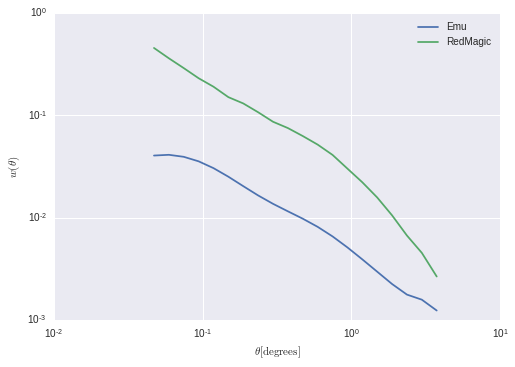

In [39]:
wt = emu.emulate_wrt_r(params, emu.scale_bin_centers)[0]
plt.plot(emu.scale_bin_centers, wt, label = 'Emu')
l = len(emu.scale_bin_centers)
#plt.plot(emu.scale_bin_centers, emu.y[(idx)*l:(idx+1)*l]+emu.y_hat, label = 'Training')
plt.plot(emu.scale_bin_centers, wt_redmagic, label = 'RedMagic')
plt.ylabel(r'$w(\theta)$')
plt.xlabel(r'$\theta \mathrm{[degrees]}$')
plt.loglog();
plt.xscale('log')
plt.legend(loc='best')

In [40]:
print wt_redmagic/wt

[ 11.26380113   8.77975517   7.36499773   6.49093545   6.25116584
   5.99404566   6.43653108   6.5040671    6.34246384   6.51430813
   6.42544498   6.36647593   6.26109989   5.89317634   5.67184625
   5.31542112   4.69067259   3.77871454   2.86827664   2.15032533]


In [31]:
print wt

[ 0.04056867  0.04124886  0.03943129  0.03561631  0.03055483  0.02519217
  0.02036542  0.01652713  0.01368562  0.01155656  0.00979106  0.00815074
  0.00657311  0.00513024  0.00392024  0.00297135  0.00225117  0.00177372
  0.00158247  0.00123967]


In [32]:
from pearce.mocks import compute_prim_haloprop_bins, cat_dict

In [33]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[a]}
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

cat.load_catalog(a)
#halo_masses = cat.halocat.halo_table['halo_mvir']

In [34]:
cat.load_model(a, 'hsabRedMagic')

In [35]:
binno = 1
params = {pname:val for pname, val in zip(emu._ordered_params.iterkeys(), emu.x[binno*binlen,:-1])}
cat.populate(params)

NameError: name 'binlen' is not defined

wt = cat.calc_wt(theta_bins, do_jackknife=False,n_cores=1)

In [ ]:
theta_bins = np.logspace(np.log10(2.5), np.log10(250), 20)/60
tpoints = (theta_bins[1:]+theta_bins[:-1])/2

In [ ]:
fig = plt.figure(figsize=(45,14))


emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.333),
                    ('alpha', 1.053),('logM1', 13.5), ('logMmin', 12.033)]

em_params = dict(emulation_point)

em_params.update(fixed_params)
del em_params['z']

fixed_params2 = {'mean_occupation_satellites_assembias_param1':0.0,
                'mean_occupation_centrals_assembias_param1':0.0,
                'disp_func_slope_satellites':1.0,
                'disp_func_slope_centrals':1.0}

for idx, (param, bounds) in enumerate(emu._ordered_params.iteritems()):
    if param == 'r':
        continue
    wt_vals = []
    new_em_params = {}
    new_em_params.update(em_params)
    new_em_params.update(fixed_params2)
    for v in np.linspace(bounds[0], bounds[1], 6):
        new_em_params[param] = v
        wt_vals.append(emu.emulate_wrt_r(new_em_params, tpoints))
    wt_vals = np.array(wt_vals)
    
    pal = sns.cubehelix_palette(wt_vals.shape[0], start=idx, rot=0.3,\
                            dark=0.0, light=.60,reverse = True)
    #sns.palplot(pal)

    sns.set_palette(pal)

    #sns.set_style("darkgrid", {"axes.facecolor": "0.85"})
    plt.subplot(5,2,idx+1)

    for color, wt, v in zip(pal, wt_vals,np.linspace(bounds[0], bounds[1], 6) ):
        plt.plot(tpoints, 1+wt[0,:], color = color, label = r'%s = %.1f'%(param,v) )
    #plt.loglog()
    plt.xscale('log')
    plt.legend(loc='best')
    plt.xlim([0.1, 4])
    plt.title(r'$w(\theta)$ variance by %s'%param)
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$w(\theta)$')
plt.show()